In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/spotify_songs_details.csv',)
df.shape

(3553, 10)

In [13]:
df.head()

,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
0,track,Die For You,260253,The Weeknd,Starboy,2016,NaN,https://open.spotify.com/track/2Ch7LmS7r2Gy2kc...,87,r&b
1,track,Girls Need Love (with Drake) - Remix,222374,"Drake, Summer Walker",Last Day Of Summer,2018,NaN,https://open.spotify.com/track/14SaZBTjxlorHJQ...,79,r&b
2,track,Dark Red,173104,Steve Lacy,Dark Red,2017,https://p.scdn.co/mp3-preview/90b3855fd50a4c48...,https://open.spotify.com/track/3EaJDYHA0KnX88J...,86,r&b
3,track,Sure Thing,195373,Miguel,All I Want Is You,2010,https://p.scdn.co/mp3-preview/d337faa4bb71c8ac...,https://open.spotify.com/track/0JXXNGljqupsJaZ...,92,r&b
4,track,One Dance,173986,"Drake, Kyla, Wizkid",Views,2016,NaN,https://open.spotify.com/track/1zi7xx7UVEFkmKf...,86,r&b


# The EDA which i wanna do
- remove na
- remove duplicates
- genre-wise how many songs are there in order to create a balanced dataset, plot them out per genre
- the how many songs before and after 2010
- some other new ideas(write them down later)

# when th EDA is done, 
- export the resulting dataset which i can use to download the songs and create images 

In [4]:
df.columns

Index(['item_type', 'song_name', 'song_duration_ms', 'artists', 'album_name',
       'release_date', 'song_preview_url', 'song_url', 'popularity', 'genre'],
      dtype='object')

In [11]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.year

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_type         3553 non-null   object
 1   song_name         3553 non-null   object
 2   song_duration_ms  3553 non-null   int64 
 3   artists           3553 non-null   object
 4   album_name        3553 non-null   object
 5   release_date      3553 non-null   int64 
 6   song_preview_url  1973 non-null   object
 7   song_url          3553 non-null   object
 8   popularity        3553 non-null   int64 
 9   genre             3553 non-null   object
dtypes: int64(3), object(7)
memory usage: 277.7+ KB


In [10]:
# df.describe()
print(df.isnull().sum())

cols_with_null_values = [features for features in df.columns if df[features].isnull().sum()>0]
print("\ncols_with_null_values")
print(cols_with_null_values)

item_type              0
song_name              0
song_duration_ms       0
artists                0
album_name             0
release_date           0
song_preview_url    1580
song_url               0
popularity             0
genre                  0
dtype: int64

cols_with_null_values
['song_preview_url']


# Most popular songs
- the metric "popularity" is decided by spotify and their apis, more recent songs have a higher chance to be popular than older ones since popularity changes over time
- that also means that a new song "might be more popular" than a song having more than a billion views released 5 years ago because it is more popular now, I think that this metric does not consider an all time popularity, but the current popularity and the current trends which the crowd prefers

In [61]:
popular_songs =  df.sort_values(by=['popularity'], ascending=False)
popular_songs.head()

,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
2135,track,Flowers,200454,Miley Cyrus,Flowers,2023,https://p.scdn.co/mp3-preview/9fbe346e805ed219...,https://open.spotify.com/track/0yLdNVWF3Srea0u...,100,pop
2133,track,Die For You - Remix,232857,"Ariana Grande, The Weeknd",Die For You (Remix),2023,NaN,https://open.spotify.com/track/7oDd86yk8itslrA...,95,pop
2127,track,Calm Down (with Selena Gomez),239317,"Rema, Selena Gomez",Calm Down (with Selena Gomez),2022,NaN,https://open.spotify.com/track/0WtM2NBVQNNJLh6...,95,pop
2137,track,Anti-Hero,200690,Taylor Swift,Midnights,2022,NaN,https://open.spotify.com/track/0V3wPSX9ygBnCm8...,94,pop
2141,track,Kill Bill,153946,SZA,SOS,2022,https://p.scdn.co/mp3-preview/49dfe4ea78c5d3c5...,https://open.spotify.com/track/3OHfY25tqY28d16...,93,pop


# checking the release date of all the songs in the dataset

<Axes: ylabel='release_date'>

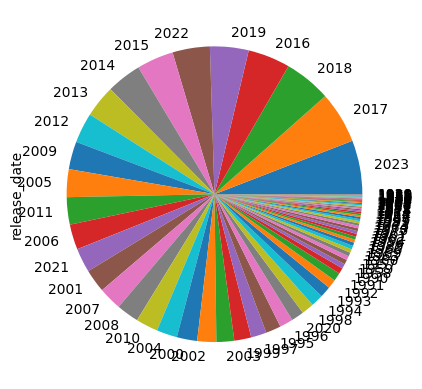

In [41]:
# https://datascienceparichay.com/article/create-a-pie-chart-of-pandas-series-values/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df['release_date'].value_counts().plot(kind='pie')

<Axes: >

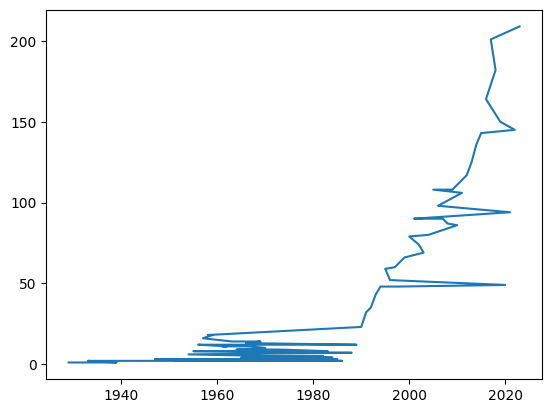

In [32]:
df['release_date'].value_counts().plot(kind='line')

## Most of the songs in this dataset belong to the 2000-till now era

<Axes: ylabel='release_date'>

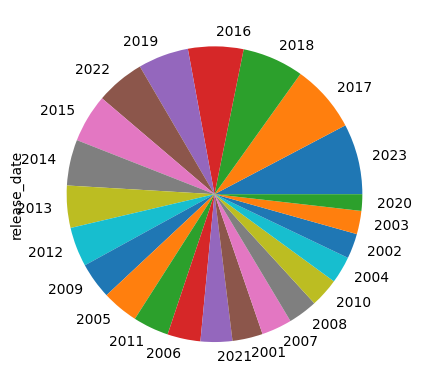

In [40]:
df['release_date'][df['release_date']>2000].value_counts().plot(kind = 'pie')

# removing duplicate songs which have same name and same artist
- it might be possible that one song is listed in multiple genres as well
-  since i am only predicting one class for one song, delete the other genre that song existed in for now
    - irrespective of the genre, i would be taking the version of the song which is considired more popular

## sorting by popularity first before dropping any duplicates
- so less popular versions of the same song get dropped

In [72]:
df = df.sort_values(by=['popularity'], ascending=False)

In [67]:
df.columns

Index(['item_type', 'song_name', 'song_duration_ms', 'artists', 'album_name',
       'release_date', 'song_preview_url', 'song_url', 'popularity', 'genre'],
      dtype='object')

In [74]:
# totally duplicate rows
df[df.duplicated()].shape
# df[df.duplicated()]

(121, 10)

In [75]:
x1 = df.duplicated(subset = ['song_name','genre','artists'])
df[x1].shape

(157, 10)

In [70]:
x2 = df.duplicated(subset = ['song_name','artists'])
df[x2].shape
# duplicate_songs =  df[x].sort_values(by=['song_name'], ascending=False)
# duplicate_songs.head()

(233, 10)

### The above filter is removing more duplicates because one song can be listed in multiple genres

### just checking how duplicated works in pandas

In [59]:
df[df['song_name']=='Pony']

,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
207,track,Pony,251733,Ginuwine,R&B: From Doo-Wop To Hip-Hop,1999,https://p.scdn.co/mp3-preview/c4694c8eeac6ffc5...,https://open.spotify.com/track/6mz1fBdKATx6qP4...,73,r&b
248,track,Pony,324800,Ginuwine,Ginuwine... The Bachelor,1996,https://p.scdn.co/mp3-preview/eef5edb058e47d1f...,https://open.spotify.com/track/5FR54UnizyI8pE5...,62,r&b


In [92]:
# the duplicate entries
print(df[x2].shape)
df[x2][df['song_name']=='Pony']

(233, 10)


/tmp/ipykernel_6768/918213884.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[x2].shape)
/tmp/ipykernel_6768/918213884.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[x2][df['song_name']=='Pony']


,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
248,track,Pony,324800,Ginuwine,Ginuwine... The Bachelor,1996,https://p.scdn.co/mp3-preview/eef5edb058e47d1f...,https://open.spotify.com/track/5FR54UnizyI8pE5...,62,r&b


In [91]:
# the dataset with all duplicate valies removed
print(df[~x2].shape)
df[~x2][df['song_name']=='Pony']

(3320, 10)


/tmp/ipykernel_6768/1636457745.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[~x2].shape)
/tmp/ipykernel_6768/1636457745.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~x2][df['song_name']=='Pony']


,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
207,track,Pony,251733,Ginuwine,R&B: From Doo-Wop To Hip-Hop,1999,https://p.scdn.co/mp3-preview/c4694c8eeac6ffc5...,https://open.spotify.com/track/6mz1fBdKATx6qP4...,73,r&b


# cleaning the dataset

In [93]:
# cleaned_df =  df[~x2].sort_values(by=['popularity'], ascending=False).sort_values(by=['song_name'], ascending=True)
cleaned_df =  df[~x2].sort_values(by=['popularity','song_name'], ascending=False)
cleaned_df.head()

/tmp/ipykernel_6768/1317316571.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df =  df[~x2].sort_values(by=['popularity','song_name'], ascending=False)


,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
2135,track,Flowers,200454,Miley Cyrus,Flowers,2023,https://p.scdn.co/mp3-preview/9fbe346e805ed219...,https://open.spotify.com/track/0yLdNVWF3Srea0u...,100,pop
2133,track,Die For You - Remix,232857,"Ariana Grande, The Weeknd",Die For You (Remix),2023,NaN,https://open.spotify.com/track/7oDd86yk8itslrA...,95,pop
2127,track,Calm Down (with Selena Gomez),239317,"Rema, Selena Gomez",Calm Down (with Selena Gomez),2022,NaN,https://open.spotify.com/track/0WtM2NBVQNNJLh6...,95,pop
2137,track,Anti-Hero,200690,Taylor Swift,Midnights,2022,NaN,https://open.spotify.com/track/0V3wPSX9ygBnCm8...,94,pop
2131,track,Until I Found You (with Em Beihold) - Em Beiho...,176440,"Em Beihold, Stephen Sanchez",Until I Found You (Em Beihold Version),2022,NaN,https://open.spotify.com/track/1Y3LN4zO1Edc2El...,93,pop


In [99]:
cleaned_df.shape

(3320, 10)

In [97]:
# sanity check for duplicates
# cleaned_df[cleaned_df.duplicated()].head()
cleaned_df[cleaned_df.duplicated()].shape

(0, 10)

In [98]:
cleaned_df.to_csv('data/spotify_songs_details_cleaned.csv',index = False)

<Axes: ylabel='genre'>

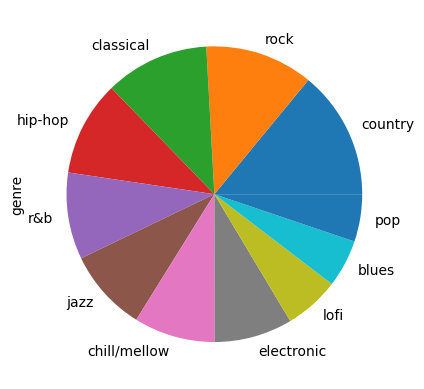

In [101]:
cleaned_df['genre'].value_counts().plot(kind = 'pie')

In [102]:
cleaned_df['genre'].value_counts()

country         466
rock            393
classical       378
hip-hop         345
r&b             315
jazz            299
chill/mellow    295
electronic      284
lofi            200
blues           173
pop             172
Name: genre, dtype: int64

In [107]:
cleaned_df['song_duration_ms'].sum() * 0.001/30, "30 second intervals"

(26666.144333333337, '30 second intervals')

# making a mini_df for testing some scripts

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cleaned_df = pd.read_csv('data/spotify_songs_details_cleaned.csv',)
cleaned_df.shape

(3320, 10)

In [15]:
genres = cleaned_df['genre'].value_counts().index.tolist()

In [16]:
songs_to_include_per_genre = 75

In [17]:
top5_songs_per_genres = []
for genre in genres:
    genre_df = cleaned_df[cleaned_df['genre'] == genre]
    genre_df = genre_df.sort_values(by=['popularity'], ascending=False)
    top5_songs_per_genres.append(genre_df.head(songs_to_include_per_genre))
    

mini_df = pd.concat(top5_songs_per_genres)

In [10]:
print(genres)
len(genres)

['country', 'rock', 'classical', 'hip-hop', 'r&b', 'jazz', 'chill/mellow', 'electronic', 'lofi', 'blues', 'pop']


11

In [11]:
mini_df['genre'].value_counts()

genre
country         75
rock            75
classical       75
hip-hop         75
r&b             75
jazz            75
chill/mellow    75
electronic      75
lofi            75
blues           75
pop             75
Name: count, dtype: int64

In [12]:
mini_df.shape

(825, 10)

In [13]:
mini_df.head()

,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
143,track,Tennessee Whiskey,293293,Chris Stapleton,Traveller,2015,NaN,https://open.spotify.com/track/3fqwjXwUGN6vbzI...,82,country
213,track,Chasin' You,205453,Morgan Wallen,If I Know Me,2018,https://p.scdn.co/mp3-preview/0f91ed4fde6bba86...,https://open.spotify.com/track/5MwynWK9s4hlyKH...,81,country
175,track,Whiskey Glasses,234346,Morgan Wallen,If I Know Me,2018,https://p.scdn.co/mp3-preview/8bfbda21b7e6c086...,https://open.spotify.com/track/6foY66mWZN0pSRj...,81,country
219,track,When It Rains It Pours,240760,Luke Combs,This One's for You,2017,https://p.scdn.co/mp3-preview/034066bcc59420c9...,https://open.spotify.com/track/1mMLMZYXkMueg65...,80,country
256,track,Beautiful Crazy,193200,Luke Combs,This One's for You Too (Deluxe Edition),2018,https://p.scdn.co/mp3-preview/7160f5cd6c0e3aff...,https://open.spotify.com/track/2rxQMGVafnNaRaX...,80,country


In [121]:
mini_df.to_csv(f'data/top{songs_to_include_per_genre}_pre_genre_spotify_songs_details_cleaned.csv',index = False)

In [124]:
mini_df.shape

(55, 10)

In [125]:
mini_df['song_name'].nunique()

54

In [128]:
mini_df[mini_df.duplicated(subset= ['song_name'])]

,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
2659,track,The Thrill Is Gone,324733,B.B. King,Completely Well,1969,NaN,https://open.spotify.com/track/4NQfrmGs9iQXVQI...,62,blues


In [129]:
mini_df[mini_df['song_name']=="The Thrill Is Gone"]

,item_type,song_name,song_duration_ms,artists,album_name,release_date,song_preview_url,song_url,popularity,genre
2745,track,The Thrill Is Gone,301133,"B.B. King, Tracy Chapman",Deuces Wild,1997,NaN,https://open.spotify.com/track/3cg0dJfrQB66Qf2...,63,blues
2659,track,The Thrill Is Gone,324733,B.B. King,Completely Well,1969,NaN,https://open.spotify.com/track/4NQfrmGs9iQXVQI...,62,blues


In [126]:
mini_df['song_url'].nunique()

55

In [134]:
save_dir = '/home/utkarsh/Desktop/music_genre_classification/data/sample_download/mp3_download'
for index, row in df.iterrows():
    print(row['song_name'])
    print(row['genre'])
    print(row['song_url'])

# save_path = ''


Flowers
pop
https://open.spotify.com/track/0yLdNVWF3Srea0uzk55zFn
Die For You - Remix
pop
https://open.spotify.com/track/7oDd86yk8itslrA9HRP2ki
Calm Down (with Selena Gomez)
pop
https://open.spotify.com/track/0WtM2NBVQNNJLh6scP13H8
Anti-Hero
pop
https://open.spotify.com/track/0V3wPSX9ygBnCm8psDIegu
Kill Bill
pop
https://open.spotify.com/track/3OHfY25tqY28d16oZczHc8
Until I Found You (with Em Beihold) - Em Beihold Version
pop
https://open.spotify.com/track/1Y3LN4zO1Edc2EluIoSPJN
Starboy
pop
https://open.spotify.com/track/7MXVkk9YMctZqd1Srtv4MB
Starboy
pop
https://open.spotify.com/track/7MXVkk9YMctZqd1Srtv4MB
Sure Thing
r&b
https://open.spotify.com/track/0JXXNGljqupsJaZsgSbMZV
I Wanna Be Yours
chill/mellow
https://open.spotify.com/track/5XeFesFbtLpXzIVDNQP22n
I Ain't Worried
pop
https://open.spotify.com/track/4h9wh7iOZ0GGn8QVp4RAOB
Players
pop
https://open.spotify.com/track/6UN73IYd0hZxLi8wFPMQij
As It Was
pop
https://open.spotify.com/track/4LRPiXqCikLlN15c3yImP7
As It Was
pop
https://op